In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/marialysak/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Only get data analyst jobs in Germany 
df_GM = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

#Drop NaN value from the 'salary_year_avg' column for accurate visualization
df_GM = df_GM.dropna(subset=['salary_year_avg'])

In [10]:
df_GM = df_GM.explode('job_skills')
df_GM[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql
...,...,...
770282,166419.5,tableau
770282,166419.5,terraform
781105,111175.0,python
781105,111175.0,pyspark


In [14]:
df_GM_group = df_GM.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median'])

In [30]:
df_GM_top_pay = df_GM_group.sort_values(by='median', ascending=False).head(10)
df_GM_skills = df_GM_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

<Axes: ylabel='job_skills'>

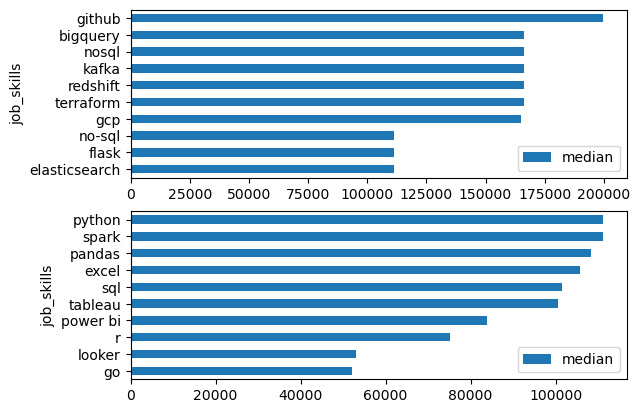

In [33]:
fig, ax = plt.subplots(2, 1)
df_GM_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
df_GM_skills[::-1].plot(kind='barh', y='median', ax=ax[1])

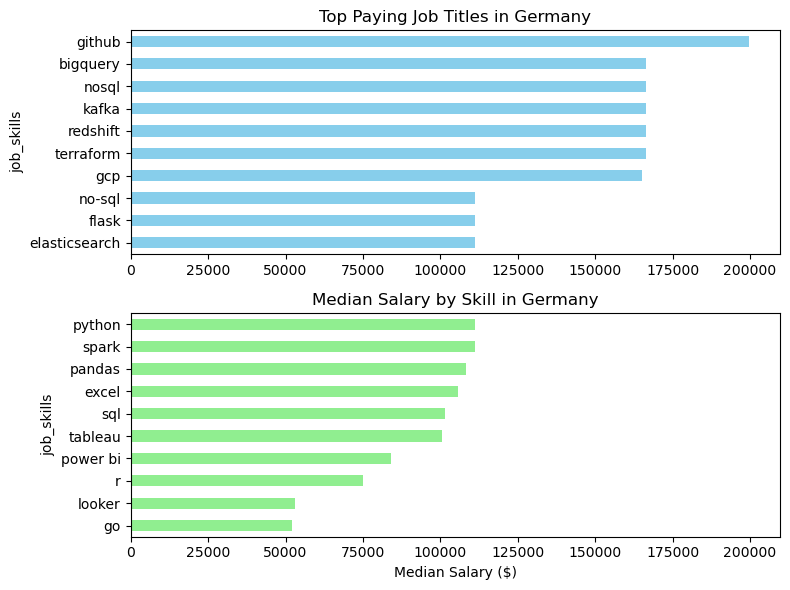

In [35]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

df_GM_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False, color='skyblue')
df_GM_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False, color='lightgreen')

ax[0].set_title('Top Paying Job Titles in Germany')
ax[1].set_title('Median Salary by Skill in Germany')

# Show x-axis on both
ax[0].tick_params(labelbottom=True)
ax[0].xaxis.set_visible(True)

plt.xlabel('Median Salary ($)')
plt.tight_layout()
plt.show()




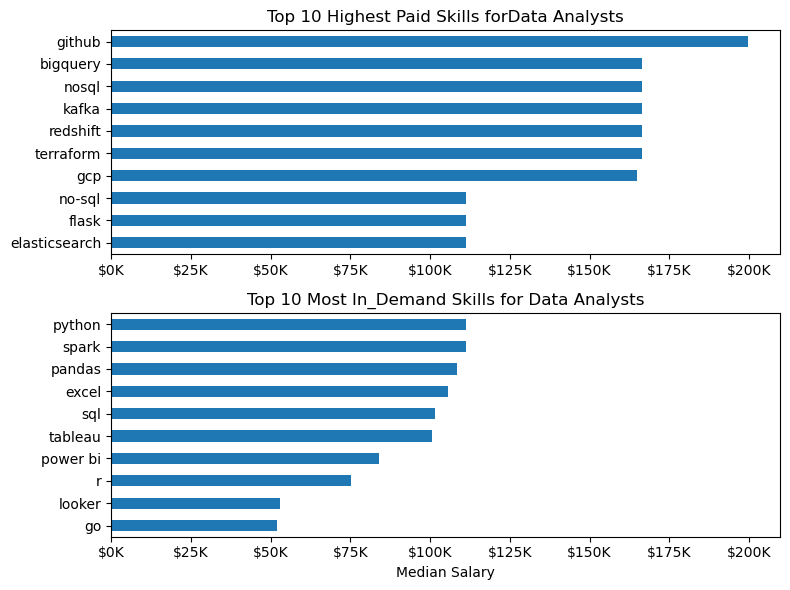

In [43]:

from matplotlib.ticker import FuncFormatter

# Formatter function: 100000 → "$100K"
def format_salary(x, pos):
    return f'${int(x / 1000)}K'

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

df_GM_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
df_GM_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills forData Analysts')
ax[1].set_title('Top 10 Most In_Demand Skills for Data Analysts')

# Apply salary formatting to both x-axes
for axis in ax:
    axis.xaxis.set_major_formatter(FuncFormatter(format_salary))

# Force x-axis to show on both subplots
ax[0].tick_params(labelbottom=True)
ax[0].xaxis.set_visible(True)

ax[0].set_ylabel('')
ax[1].set_ylabel('')


plt.xlabel('Median Salary')
plt.tight_layout()
plt.show()
